In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
datos = pd.read_csv('metro - Hoja 1.csv')

In [76]:
coordenadas = datos['Coordenadas'].str.split(',', expand=True)

In [77]:
df_new = pd.concat([datos, coordenadas] , axis=1)

In [78]:
df_new[0] = df_new[0].astype(float)
df_new[1] = df_new[1].astype(float)

In [79]:
def obtener_linea(linea):
    plt.axis('off')
    x = df_new[df_new['Linea'] == linea][1]
    y = df_new[df_new['Linea'] == linea][0]
    color = df_new[df_new['Linea'] == linea]['Color'].iloc[0]
    return plt.plot(x, y, color=color)


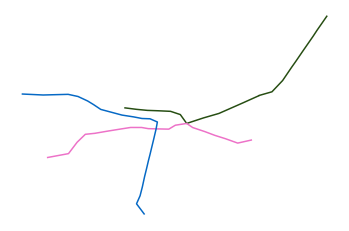

In [80]:
obtener_linea('B')
obtener_linea('1')
obtener_linea('2');

## Sacar Distancias

In [81]:
df_new[['Estacion', 'Linea',0, 1]]

,Estacion,Linea,0,1
0,Buenavista,B,19.446166,-99.152347
1,Guerrero,B,19.444746,-99.145190
2,Garibaldi,B,19.443751,-99.138552
3,Lagunilla,B,19.443373,-99.131806
4,Tepito,B,19.442820,-99.124111
...,...,...,...,...
190,Peñón Viejo,A,NaN,NaN
191,Acatitla,A,NaN,NaN
192,Santa Marta,A,NaN,NaN
193,Los Reyes,A,NaN,NaN


In [82]:
data_distancias = df_new[['Estacion', 'Linea',0, 1]]
data_distancias

,Estacion,Linea,0,1
0,Buenavista,B,19.446166,-99.152347
1,Guerrero,B,19.444746,-99.145190
2,Garibaldi,B,19.443751,-99.138552
3,Lagunilla,B,19.443373,-99.131806
4,Tepito,B,19.442820,-99.124111
...,...,...,...,...
190,Peñón Viejo,A,NaN,NaN
191,Acatitla,A,NaN,NaN
192,Santa Marta,A,NaN,NaN
193,Los Reyes,A,NaN,NaN


In [83]:
from scipy.spatial import distance

In [84]:
estaciones_linea_1 = data_distancias[data_distancias['Linea']== '1']['Estacion'].values

In [85]:
estaciones_linea_1

array(['Observatorio', 'Tacubaya', 'Juanacatlán', 'Chapultepec',
       'Sevilla', 'Insurgentes', 'Cuauhtémoc', 'Balderas',
       'Salto del Agua', 'Isabel la Católica', 'Pino Suárez', 'Merced',
       'Candelaria', 'San Lázaro', 'Moctezuma', 'Balbuena',
       'Boulevard Puerto Aéreo', 'Gómez Farías', 'Zaragoza', 'Pantitlán'],
      dtype=object)

In [86]:
estaciones_distancias_linea_1 = []
origen_destino = {}

for i in range(len(estaciones_linea_1)-1):
    origen_destino['Origen'] = estaciones_linea_1[i]
    origen_destino['Destino'] = estaciones_linea_1[i+1]
    x1, y1 = data_distancias[data_distancias['Estacion']==estaciones_linea_1[i]][1].values[0],data_distancias[data_distancias['Estacion']==estaciones_linea_1[i]][0].values[0]
    x2, y2 = data_distancias[data_distancias['Estacion']==estaciones_linea_1[i+1]][1].values[0],data_distancias[data_distancias['Estacion']==estaciones_linea_1[i+1]][0].values[0]

    origen_destino['Distancia'] = distance.euclidean((x1, y1), (x2, y2))

    estaciones_distancias_linea_1.append(origen_destino)
    origen_destino = {}

distancias = pd.DataFrame(estaciones_distancias_linea_1)
distancias


,Origen,Destino,Distancia
0,Observatorio,Tacubaya,0.013433
1,Tacubaya,Juanacatlán,0.012236
2,Juanacatlán,Chapultepec,0.009212
3,Chapultepec,Sevilla,0.005946
4,Sevilla,Insurgentes,0.008023
5,Insurgentes,Cuauhtémoc,0.008860
6,Cuauhtémoc,Balderas,0.006008
7,Balderas,Salto del Agua,0.006802
8,Salto del Agua,Isabel la Católica,0.004285
9,Isabel la Católica,Pino Suárez,0.004914


In [87]:
import networkx as nx

In [127]:
def sacar_estaciones_destino(Origen, Destino):
    df = pd.read_csv('Distancias - Hoja 1.csv')
    df['Origen'] = df['Origen'].str.lower()
    df['Destino'] = df['Destino'].str.lower()
    METRO = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Longitud')
    djk_path= nx.dijkstra_path(METRO, source=Origen, target=Destino, weight='Longitud de interestación')
    return(djk_path)

In [212]:
def pintar_trayectoria(lista_estaciones):
    lineas = obtener_datos()
    for i in range(len(lista_estaciones)):
        cantidad_transbordes = len(lineas[lineas['Estacion'] == lista_estaciones[i]][['Estacion','Linea']].values)
        if cantidad_transbordes > 0:
            transbordes = ", ".join(lineas[lineas['Estacion'] == lista_estaciones[i]]['Linea'].values)
            print(f'* {lista_estaciones[i].title()}')
            print(f'| Líneas: {transbordes}')
            print(f'|')

In [177]:
def obtener_datos():
    datos = pd.read_csv('metro - Hoja 1.csv')
    datos['Estacion'] = datos['Estacion'].str.lower()
    return datos

In [178]:
lista_estaciones = sacar_estaciones_destino('Balbuena'.lower(), 'Universidad'.lower())
datos = obtener_datos()
print(lista_estaciones)

['balbuena', 'moctezuma', 'san lázaro', 'candelaria', 'fray servando', 'jamaica', 'chabacano', 'lázaro cardenas', 'centro médico', 'etiopía/plaza de la transparencia', 'eugenia', 'división del norte', 'zapata', 'coyoacán', 'viveros/derechos humanos', 'miguel ángel de quevedo', 'copilco', 'universidad']


In [213]:
pintar_trayectoria(lista_estaciones)

* Balbuena
| Líneas: 1
|
* Moctezuma
| Líneas: 1
|
* San Lázaro
| Líneas: 1
|
* Candelaria
| Líneas: 1
|
* Fray Servando
| Líneas: 4
|
* Jamaica
| Líneas: 4, 9
|
* Chabacano
| Líneas: 2, 8, 9
|
* Centro Médico
| Líneas: 3, 9
|
* Etiopía/Plaza De La Transparencia
| Líneas: 3
|
* Eugenia
| Líneas: 3
|
* División Del Norte
| Líneas: 3
|
* Zapata
| Líneas: 3, 12
|
* Coyoacán
| Líneas: 3
|
* Viveros/Derechos Humanos
| Líneas: 3
|
* Miguel Ángel De Quevedo
| Líneas: 3
|
* Copilco
| Líneas: 3
|
* Universidad
| Líneas: 3
|


In [215]:
import time

In [219]:
def obtener_datos_distancias():
    df = pd.read_csv('Distancias - Hoja 1.csv')
    df['Origen'] = df['Origen'].str.lower()
    df['Destino'] = df['Destino'].str.lower()
    return df

In [220]:
obtener_datos_distancias()

,Origen,Destino,Longitud
0,pantitlán,zaragoza,"1,32"
1,zaragoza,gómez farías,762
2,gómez farías,boulevard puerto aéreo,611
3,boulevard puerto aéreo,balbuena,595
4,balbuena,moctezuma,703
...,...,...,...
178,eje central,parque de los venados,"1,28"
179,parque de los venados,zapata,563
180,zapata,hospital 20 de noviembre,450
181,hospital 20 de noviembre,insurgentes sur,725


In [218]:
lista_estaciones

['balbuena',
 'moctezuma',
 'san lázaro',
 'candelaria',
 'fray servando',
 'jamaica',
 'chabacano',
 'lázaro cardenas',
 'centro médico',
 'etiopía/plaza de la transparencia',
 'eugenia',
 'división del norte',
 'zapata',
 'coyoacán',
 'viveros/derechos humanos',
 'miguel ángel de quevedo',
 'copilco',
 'universidad']

In [244]:
from datetime import datetime, timedelta

In [274]:
df = obtener_datos_distancias()
curr = datetime.now()

distancia = []

for i in range(len(lista_estaciones)-2):
    distancia.append(int(df[((df['Origen'] == lista_estaciones[i])|(df['Origen'] == lista_estaciones[i+1])) & ((df['Origen'] == lista_estaciones[i])|(df['Origen'] == lista_estaciones[i+1]))]['Longitud'].values[0].replace(',','')))

distancia_total = sum(distancia)
minutos = (distancia_total * 60)/25400

new_datetime = timedelta(minutes=minutos)

lapso = curr + new_datetime

print(minutos)


33.5503937007874
